In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os

# Define the transformation for training for each variation
transform_color = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

transform_bw = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

transform_gray = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

transform_64 = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
])

transform_color_128 = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),           # Convert images to tensors
])

transform_color_256 = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),           # Convert images to tensors
])

# Load the Waldo datasets for each variation
root_path = "/unity/f2/asugandhi/MonsoonForecast/findWaldos/wheres-waldo/Hey-Waldo"
dataset_color = ImageFolder(root=os.path.join(root_path, "64"), transform=transform_color)
dataset_color_128 = ImageFolder(root=os.path.join(root_path, "128"), transform=transform_color_128) 
dataset_color_256 = ImageFolder(root=os.path.join(root_path, "256"), transform=transform_color_256)
# dataset_bw = ImageFolder(root=os.path.join(root_path, "64-bw"), transform=transform_bw)
# dataset_gray = ImageFolder(root=os.path.join(root_path, "64-gray"), transform=transform_gray)


# We Start By first Labelling Images is Waldo and Not Waldo

['notwaldo', 'waldo']


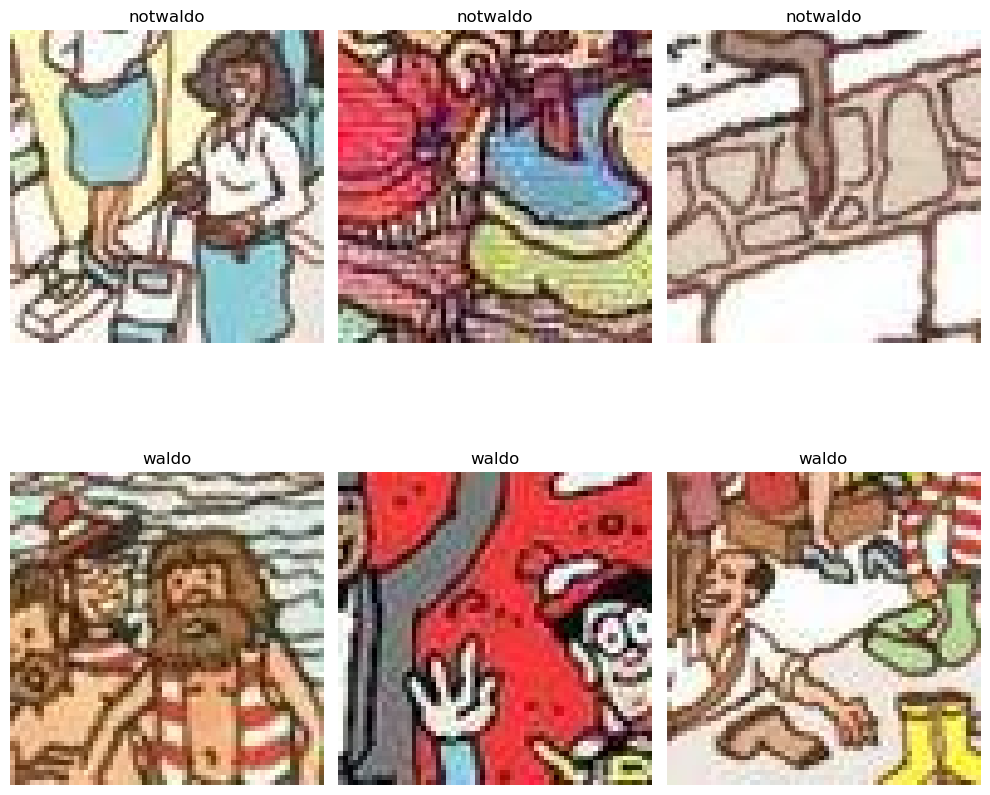

In [25]:
print(dataset_color.classes)
class_labels = dataset_color.classes

num_samples_per_class = 3
fig, axes = plt.subplots(len(class_labels), num_samples_per_class, figsize=(10, 10))
root_path = "/unity/f2/asugandhi/MonsoonForecast/findWaldos/wheres-waldo/Hey-Waldo/64"
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(root_path, class_label)
    class_images = os.listdir(class_dir)[:num_samples_per_class]
    for j, image_name in enumerate(class_images):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(class_label)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


['notwaldo', 'waldo']


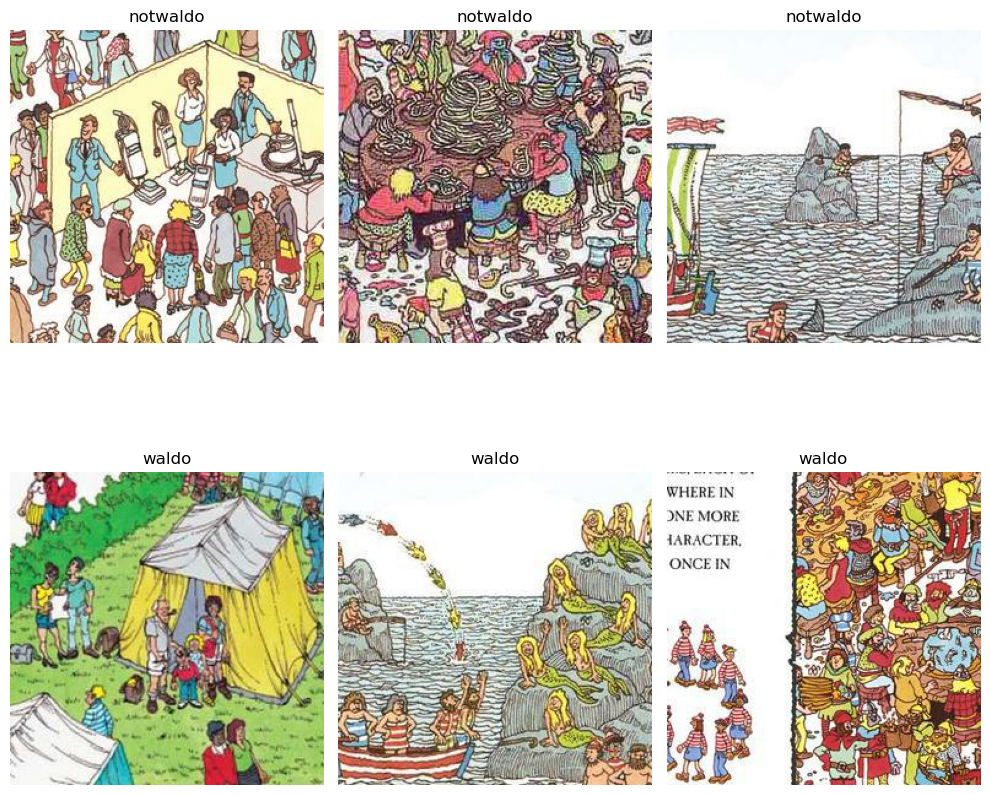

In [27]:
print(dataset_color.classes)
class_labels = dataset_color_256.classes

num_samples_per_class = 3
fig, axes = plt.subplots(len(class_labels), num_samples_per_class, figsize=(10, 10))
root_path = "/unity/f2/asugandhi/MonsoonForecast/findWaldos/wheres-waldo/Hey-Waldo/256"
for i, class_label in enumerate(class_labels):
    class_dir = os.path.join(root_path, class_label)
    class_images = os.listdir(class_dir)[:num_samples_per_class]
    for j, image_name in enumerate(class_images):
        image_path = os.path.join(class_dir, image_name)
        image = Image.open(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(class_label)
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


In [35]:

# Concatenate datasets
train_dataset = ConcatDataset([dataset_color])

# Define data loader for training
train_data_loader = DataLoader(train_dataset, batch_size=5, shuffle=True)
for images, labels in train_data_loader:
    print(images.shape)
    print(labels.shape)
    break


torch.Size([5, 3, 64, 64])
torch.Size([5])


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define a simple CNN model for classification
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.fc1 = nn.Linear(32 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)  # 2 classes: Waldo or not Waldo

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2, 2)
        x = x.view(-1, 32 * 16 * 16)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
])

# Load the dataset (assuming you have a dataset directory named 'waldo_dataset')


# Create a DataLoader
data_loader = DataLoader(dataset_color, batch_size=32, shuffle=True)

# Check if GPU is available and move the model and data to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(data_loader)}")

print("Training finished.")


Using device: cuda
Epoch 1, Loss: 0.060274210279620224
Epoch 2, Loss: 0.048527472399395526
Epoch 3, Loss: 0.047097848647050945


KeyboardInterrupt: 

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, ConcatDataset
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os

# Define the transformation for training for each variation
transform_color = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

transform_bw = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor()
])

transform_gray = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

transform_64 = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64
    transforms.ToTensor(),         # Convert images to tensors
])

transform_color_128 = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),           # Convert images to tensors
])

transform_color_256 = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 256x256
    transforms.ToTensor(),           # Convert images to tensors
])

# Load the Waldo datasets for each variation
root_path = "/unity/f2/asugandhi/MonsoonForecast/findWaldos/wheres-waldo/Hey-Waldo"
dataset_color = ImageFolder(root=os.path.join(root_path, "64"), transform=transform_color)
dataset_color_128 = ImageFolder(root=os.path.join(root_path, "128"), transform=transform_color_128) 
dataset_color_256 = ImageFolder(root=os.path.join(root_path, "256"), transform=transform_color_256)
# dataset_original = ImageFolder(root=os.path.join(root_path, "original-images"), transform=transform_color_256)
# dataset_bw = ImageFolder(root=os.path.join(root_path, "64-bw"), transform=transform_bw)
# dataset_gray = ImageFolder(root=os.path.join(root_path, "64-gray"), transform=transform_gray)
# Load the dataset (assuming you have a dataset directory named 'waldo_dataset')
train_size_color = int(0.8 * len(dataset_color))
val_size_color = len(dataset_color) - train_size_color
train_set_color, val_set_color = random_split(dataset_color, [train_size_color, val_size_color])

train_size_128 = int(0.8 * len(dataset_color_128))
val_size_128 = len(dataset_color_128) - train_size_128
train_set_128, val_set_128 = random_split(dataset_color_128, [train_size_128, val_size_128])

train_size_256 = int(0.8 * len(dataset_color_256))
val_size_256 = len(dataset_color_256) - train_size_256
train_set_256, val_set_256 = random_split(dataset_color_256, [train_size_256, val_size_256])

# Define data loaders
train_loader_color = DataLoader(train_set_color, batch_size=32, shuffle=True)
val_loader_color = DataLoader(val_set_color, batch_size=32, shuffle=False)

train_loader_128 = DataLoader(train_set_128, batch_size=32, shuffle=True)
val_loader_128 = DataLoader(val_set_128, batch_size=32, shuffle=False)

train_loader_256 = DataLoader(train_set_256, batch_size=32, shuffle=True)
val_loader_256 = DataLoader(val_set_256, batch_size=32, shuffle=False)

# Check if GPU is available and move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Load pre-trained ResNet-50 model
pretrained_model = models.resnet50(pretrained=True)

# Freeze all layers except the final fully connected layer
for param in pretrained_model.parameters():
    param.requires_grad = False

# Modify the final fully connected layer to have 2 output classes
num_ftrs = pretrained_model.fc.in_features
pretrained_model.fc = nn.Linear(num_ftrs, 2)  # 2 classes: Waldo or not Waldo

# Move the model to GPU if available
pretrained_model = pretrained_model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(pretrained_model.parameters(), lr=0.001)

# Define the datasets and loaders for each resolution
datasets = [
    (train_set_color, train_loader_color, val_loader_color),
    (train_set_128, train_loader_128, val_loader_128),
    (train_set_256, train_loader_256, val_loader_256)
]

# Train the model sequentially on each dataset
for i, (train_set, train_loader, val_loader) in enumerate(datasets):
    # Train the model
    num_epochs = 100
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = pretrained_model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        if (epoch + 1) % 10 == 0:  # Print every 10 epochs
            print(f"Epoch {epoch+1} for dataset {i+1}, Loss: {running_loss / len(train_loader)}")

    print(f"Training finished for dataset {i+1}.")

    # Validation
    pretrained_model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = pretrained_model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Validation Accuracy for dataset {i+1}: {100 * correct / total}%")

    # Save the trained model
    
    torch.save(pretrained_model.state_dict(), f'waldo_classifier_dataset_{i+1}.pth')
    print(f"Model for dataset {i+1} saved.")

Using device: cuda


/unity/f2/asugandhi/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 10, Loss: 0.23238672968000174
Epoch 20, Loss: 0.19954351941123605
Epoch 30, Loss: 0.1523905275389552
Epoch 40, Loss: 0.10908943135291338
Epoch 50, Loss: 0.11074883583933115
Epoch 60, Loss: 0.09625402092933655
Epoch 70, Loss: 0.08425711235031486
Epoch 80, Loss: 0.07767691346816719
Epoch 90, Loss: 0.06389756593853235
Epoch 100, Loss: 0.05248245410621166
Training finished.
Validation Accuracy: 90.625%
Model saved.


In [58]:
model = SimpleCNN()
model.load_state_dict(torch.load('waldo_classifier_100.pth'))
model.eval()  # Set the model to evaluation mode

# Preprocess the random image
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 64x64 (same as during training)
    transforms.ToTensor(),         # Convert images to tensors
])
original_images_dir = '/unity/f2/asugandhi/MonsoonForecast/findWaldos/wheres-waldo/Hey-Waldo/256/waldo'
# Load the random image
image_files = [f for f in os.listdir(original_images_dir) if os.path.isfile(os.path.join(original_images_dir, f))]

# Perform inference on each image
counter = 0
for image_file in image_files:
    # Load the image
    image_path = os.path.join(original_images_dir, image_file)
    image = Image.open(image_path)
    
    # Preprocess the image
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    # Perform inference
    with torch.no_grad():
        output = model(image_tensor)
    
    # Interpret the predictions
    probabilities = torch.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()
    
    # Define class labels
    class_labels = ['Not Waldo', 'Waldo']
    
    # Print the prediction
    counter+=1
    print(f"Image: {image_file}, Predicted class: {class_labels[predicted_class]}")
    print(counter)

Image: 4_0_3.jpg, Predicted class: Not Waldo
1
Image: 2_1_0.jpg, Predicted class: Not Waldo
2
Image: 9_0_2.jpg, Predicted class: Not Waldo
3
Image: 13_0_3.jpg, Predicted class: Not Waldo
4
Image: 3_3_0.jpg, Predicted class: Not Waldo
5
Image: 10_3_1.jpg, Predicted class: Not Waldo
6
Image: 19_0_1.jpg, Predicted class: Not Waldo
7
Image: 18_3_1.jpg, Predicted class: Not Waldo
8
Image: 4_0_2.jpg, Predicted class: Not Waldo
9
Image: 12_0_3.jpg, Predicted class: Not Waldo
10
Image: 6_3_0.jpg, Predicted class: Not Waldo
11
Image: 7_3_1.jpg, Predicted class: Not Waldo
12
Image: 2_0_1.jpg, Predicted class: Not Waldo
13
Image: 13_0_2.jpg, Predicted class: Not Waldo
14
Image: 9_0_3.jpg, Predicted class: Not Waldo
15
Image: 11_1_2.jpg, Predicted class: Not Waldo
16
Image: 18_0_3.jpg, Predicted class: Not Waldo
17
Image: 14_0_3.jpg, Predicted class: Not Waldo
18
Image: 11_3_3.jpg, Predicted class: Not Waldo
19
Image: 16_2_1.jpg, Predicted class: Not Waldo
20
Image: 12_0_0.jpg, Predicted class: No